In [60]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
# Set working directory
os.chdir(input("Select a folder to store results: "))
#C:\Users\Dovhu\python-course\Python-course-project\Test folder for python script

Select a folder to store results: C:\Users\Dovhu\python-course\Python-course-project\Test folder for python script


In [62]:
# Load dataset
main_table = pd.read_csv(input("Select XCMS output file: "),
                         sep=",", header=0, decimal=".")

Select XCMS output file: C:\Users\Dovhu\python-course\Python-course-project\Test folder for python script\xcms_output.csv


In [ ]:
#C:\Users\Dovhu\python-course\Python-course-project\Test folder for python script\xcms_output.csv

In [63]:
# Subset of all samples
samples = main_table.iloc[:, 22:]

In [64]:
# Compound search range
mass_error = 0.05
rt_error = 120

In [65]:
# Load specs
std_specs = pd.read_csv(input("Select specs file: "),
                        sep=",", header=None, names=["name", "mz", "RT"])

Select specs file: C:\Users\Dovhu\python-course\Python-course-project\Test folder for python script\compounds.csv


In [42]:
#C:\Users\Dovhu\python-course\Python-course-project\Test folder for python script\compounds.csv

In [66]:
# Transform RT from min to sec
std_specs["RT"] = std_specs["RT"] * 60

C:\Users\Dovhu\AppData\Local\Temp\ipykernel_9572\2955518519.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["AV"] = temp.mean(axis=1, skipna=True)
C:\Users\Dovhu\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 34.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 640x480 with 0 Axes>

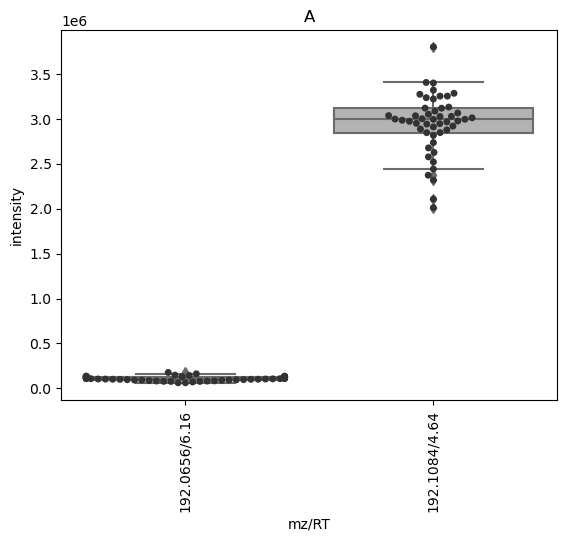

C:\Users\Dovhu\AppData\Local\Temp\ipykernel_9572\2955518519.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["AV"] = temp.mean(axis=1, skipna=True)
C:\Users\Dovhu\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 61.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 640x480 with 0 Axes>

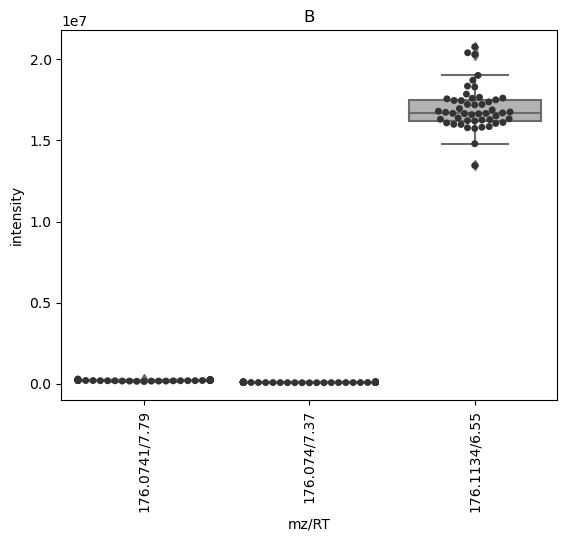

C:\Users\Dovhu\AppData\Local\Temp\ipykernel_9572\2955518519.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["AV"] = temp.mean(axis=1, skipna=True)
C:\Users\Dovhu\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 44.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 640x480 with 0 Axes>

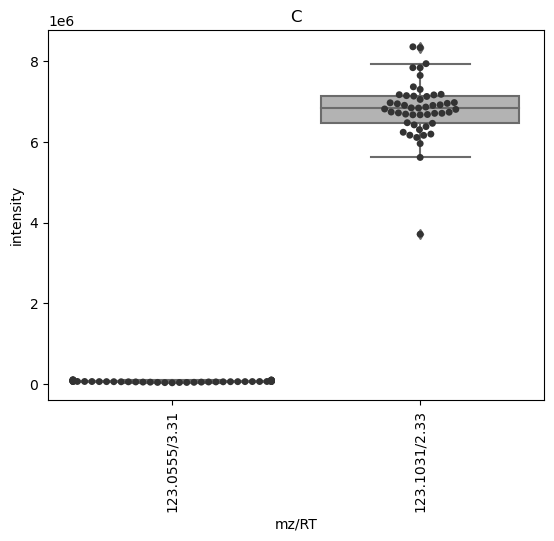

In [67]:
# Main loop
temp = pd.DataFrame()
temp2 = pd.DataFrame()
std = pd.DataFrame()
for i in range(len(std_specs)):
    name = std_specs.iloc[i, 0]
    mz = std_specs.iloc[i, 1]
    RT = std_specs.iloc[i, 2]

    if len(main_table[(main_table["mzmed"] > (mz - mass_error)) &
                      (main_table["mzmed"] < (mz + mass_error)) &
                      (main_table["rtmed"] > (RT - rt_error)) &
                      (main_table["rtmed"] < (RT + rt_error))]) > 0:
        # Sampling
        # Sampling all features fitting mz and RT criteria
        temp = samples[(main_table["mzmed"] > (mz - mass_error)) &
                       (main_table["mzmed"] < (mz + mass_error)) &
                       (main_table["rtmed"] > (RT - rt_error)) &
                       (main_table["rtmed"] < (RT + rt_error))]
        # Subset for visualization
        temp_Int = temp
        temp2 = pd.DataFrame(temp_Int.T)
        temp_mz = main_table["mzmed"][(main_table["mzmed"] > (mz - mass_error)) &
                                      (main_table["mzmed"] < (mz + mass_error)) &
                                      (main_table["rtmed"] > (RT - rt_error)) &
                                      (main_table["rtmed"] < (RT + rt_error))].round(4)
        temp_rt = main_table["rtmed"][(main_table["mzmed"] > (mz - mass_error)) &
                                      (main_table["mzmed"] < (mz + mass_error)) &
                                      (main_table["rtmed"] > (RT - rt_error)) &
                                      (main_table["rtmed"] < (RT + rt_error))] / 60
        temp_rt = temp_rt.round(2)
        temp_name = [str(temp_mz.iloc[i]) + "/" + str(temp_rt.iloc[i]) for i in range(len(temp_mz))]
        temp2.columns = temp_name
        # Adding average column
        temp["AV"] = temp.mean(axis=1, skipna=True)
        # Overwrite data frame with only one feature with highest average signal
        temp = temp[temp["AV"] == max(temp["AV"])]
        # Remove average column
        temp = temp.drop("AV", axis=1)
        # Name row according to the CS compound
        temp.index = [name]
        std = pd.concat([std, temp])

        # Boxplot
        plot_name = name
        plt.clf()
        fig, ax = plt.subplots()
        sns.boxplot(data=temp2, color=".7")
        sns.swarmplot(data=temp2, color=".2")
    ax.set(title=plot_name, xlabel="mz/RT", ylabel="intensity")
    plt.xticks(rotation=90)
    plt.savefig("S - " + name + ".png", dpi=1000)
    plt.show()

In [68]:
#Save results
std.to_csv("Standards.csv", index=True, header=True)